# Starter example for pyicon using xarray

Some specific commands for Jupyter:

In [1]:
# Jupyter Notebook with widget matplotlib plots
#%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

Load necessary modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import pyicon as pyic
import xarray as xr
import cartopy.crs as ccrs

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


## Names and paths

Define the name of the simulation, its grid, the path to the data and paths to the grid:

In [3]:
run = 'nib0004'
gname = 'r2b6_oce_r0004'
lev = 'L64'

path_data     = f'/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_08/icon-oes/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'
fpath_tgrid   = f'{path_grid}{gname}_tgrid.nc'

# choose resolution for interplation between 0.10, 0.30, 0.10, 0.02 
# (or have a look in f'{path_grid}/ckdtree/rectgrids/' for possible options)
fpath_ckdtree = f'{path_grid}/ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.nc'

## Specify data set

In [4]:
ds = xr.open_dataset(f'{path_data}/nib0004_20810101T000000Z.nc')

## Show some informatioin about data set (optional)

In [5]:
ds

<xarray.Dataset>
Dimensions:                    (depth: 64, depth_2: 65, lev: 1, ncells: 235403, ncells_2: 356545, time: 19, vertices: 3, vertices_2: 4)
Coordinates:
  * time                       (time) datetime64[ns] 2081-01-01 ... 2090-01-01
    clon                       (ncells) float32 ...
    clat                       (ncells) float32 ...
    elon                       (ncells_2) float32 ...
    elat                       (ncells_2) float32 ...
  * depth                      (depth) float64 6.0 17.0 ... 5.334e+03 5.589e+03
  * depth_2                    (depth_2) float64 0.0 12.0 ... 5.719e+03
  * lev                        (lev) float64 0.0
Dimensions without coordinates: ncells, ncells_2, vertices, vertices_2
Data variables: (12/36)
    clon_bnds                  (ncells, vertices) float32 ...
    clat_bnds                  (ncells, vertices) float32 ...
    elon_bnds                  (ncells_2, vertices_2) float32 ...
    elat_bnds                  (ncells_2, vertices_2) float32 ...
    zos                        (time, ncells) float32 ...
    to                         (time, depth, ncells) float32 ...
    ...                         ...
    zos_square                 (time, ncells) float32 ...
    hi                         (time, lev, ncells) float32 ...
    hs                         (time, lev, ncells) float32 ...
    conc                       (time, lev, ncells) float32 ...
    ice_u                      (time, ncells) float32 ...
    ice_v                      (time, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    number_of_grid_used:  42
    uuidOfHGrid:          f4ed57f6-b2ea-11e9-ae92-c52a3fa37d96
    history:              /home/mpim/m300602/work/proj_vmix/icon/icon_08/icon...
    source:               git@git.mpimet.mpg.de:icon-oes.git@fedac51a127a0253...
    institution:          Max Planck Institute for Meteorology
    Conventions:          CF-1.6
    title:                ICON simulation
    references:           see MPIM/DWD publications
    comment:              Nils Brüggemann (m300602) on m10108 (Linux 2.6.32-7...

In [6]:
ds.time

<xarray.DataArray 'time' (time: 19)>
array(['2081-01-01T00:00:00.000000000', '2082-01-01T00:00:00.000000000',
       '2083-01-01T00:00:00.000000000', '2084-01-01T00:00:00.000000000',
       '2085-01-01T00:00:00.000000000', '2086-01-01T00:00:00.000000000',
       '2087-01-01T00:00:00.000000000', '2088-01-01T00:00:00.000000000',
       '2089-01-01T00:00:00.000000000', '2090-01-01T00:00:00.000000000',
       '2082-01-01T00:00:00.000000000', '2083-01-01T00:00:00.000000000',
       '2084-01-01T00:00:00.000000000', '2085-01-01T00:00:00.000000000',
       '2086-01-01T00:00:00.000000000', '2087-01-01T00:00:00.000000000',
       '2088-01-01T00:00:00.000000000', '2089-01-01T00:00:00.000000000',
       '2090-01-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2081-01-01 2082-01-01 ... 2090-01-01
Attributes:
    standard_name:  time
    axis:           T

In [7]:
ds.depth

<xarray.DataArray 'depth' (depth: 64)>
array([   6. ,   17. ,   27. ,   37. ,   47. ,   57. ,   67. ,   77. ,   87. ,
         97. ,  107.5,  119. ,  131.5,  145. ,  159.5,  175. ,  191.5,  209. ,
        228. ,  249. ,  272. ,  297. ,  324. ,  353. ,  384. ,  417.5,  454. ,
        493.5,  536.5,  583.5,  634.5,  690. ,  750. ,  814. ,  882.5,  955.5,
       1033. , 1115.5, 1203.5, 1297.5, 1398. , 1505.5, 1620. , 1741.5, 1870. ,
       2005. , 2146.5, 2295. , 2451. , 2614.5, 2785.5, 2964. , 3149. , 3340.5,
       3538.5, 3743. , 3953.5, 4169.5, 4391. , 4618. , 4850.5, 5088.5, 5334. ,
       5589. ])
Coordinates:
  * depth    (depth) float64 6.0 17.0 27.0 ... 5.088e+03 5.334e+03 5.589e+03
Attributes:
    standard_name:  depth
    long_name:      depth_below_sea
    units:          m
    positive:       down
    axis:           Z

## Select data

In [8]:
to = ds['to'].isel(time=0, depth=0)
to_3d = ds['to'].isel(time=0)

## Derive some means and show shape etc. (optional)

Mask land values (assuming 0 data values to be land):

In [9]:
to = to.where(to!=0.)

We can calculate the mean value:

In [10]:
to.mean()

<xarray.DataArray 'to' ()>
array(18.135742, dtype=float32)
Coordinates:
    time     datetime64[ns] 2081-01-01
    depth    float64 6.0

In [11]:
to.time

<xarray.DataArray 'time' ()>
array('2081-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2081-01-01
    depth    float64 6.0
Attributes:
    standard_name:  time
    axis:           T

or get information about the size of the data:

In [12]:
to.shape

(235403,)

In [13]:
to_3d.shape

(64, 235403)

## Interpolate data to a regular grid

Use the pyicon interp_to_rectgrid_xr function. The path to the regular grid ckdtree file (fpath_ckdtree) needs to be specified. It decides which regular grid is taken but only those grids can be chosen which were calculated and saved externally.

In [14]:
toi = pyic.interp_to_rectgrid_xr(to, fpath_ckdtree)

## Plotting with xarray

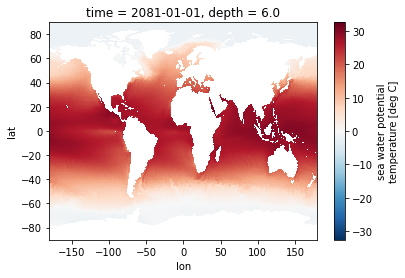

In [15]:
fig = plt.figure()
toi.plot()

## Plotting with pyicon

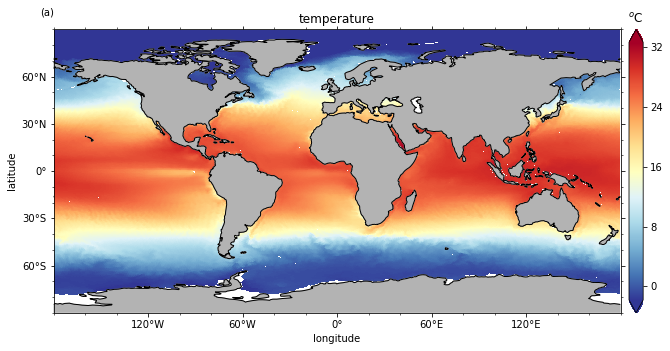

In [16]:
projection = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, projection=projection)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(toi.lon, toi.lat, toi, ax=ax, cax=cax, clim='auto')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('temperature')
cax.set_title('$^o$C')

pyic.plot_settings(ax, template='global')

## Plotting a region on the original triangular grid

Speficy region and derive triangulation object:

In [18]:
lon_reg = [-60,-40]
lat_reg = [0, 10]
ds_tg = xr.open_dataset(fpath_tgrid)
ind_reg, Tri = pyic.triangulation(ds_tg, lon_reg, lat_reg)

Cut data to region:

In [19]:
to_reg = to.isel(ncells=ind_reg)

Plotting:

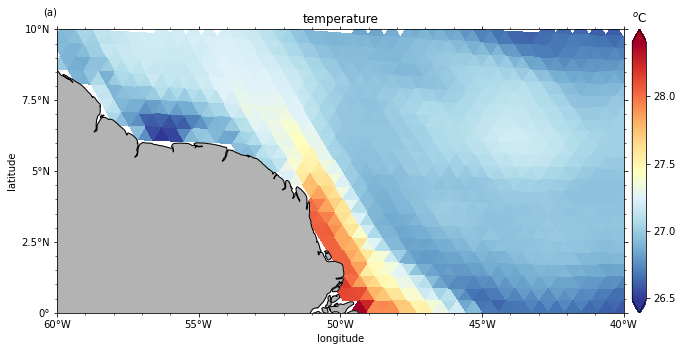

In [20]:
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, projection=projection)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(Tri, to_reg, ax=ax, cax=cax)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('temperature')
cax.set_title('$^o$C')

pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)